In [1]:
import requests
import numpy as np
import pandas as pd
from collections import Counter
import seaborn as sns
%matplotlib inline

In [2]:
draft_order = ['Aaron', 'John', 'Brian', 'Josh', 'Brad', 'Micah', 'Matt', 'Jon', 'Ryan', 'Colin', 
               'Matt', 'Colin', 'Brian', 'Ryan', 'Brad', 'John', 'Jon', 'Josh', 'Micah', 'Aaron', 
               'Jon', 'Micah', 'Ryan', 'Colin', 'Josh', 'Aaron', 'Brad', 'Matt', 'John', 'Brian','','']

In [143]:
# for determining optimal assigments given current scores
# must run code below before this
team_ranking = df_union.groupby(["team"])[["win"]].sum().sort_values('win', ascending=False)
team_assignment = {t:p for t,p in zip(team_ranking.index, draft_order)}
team_assignment

{'Arizona': '',
 'Atlanta': 'Aaron',
 'Baltimore': 'Colin',
 'Buffalo': 'Josh',
 'Carolina': 'Colin',
 'Chicago': 'Ryan',
 'Cincinnati': 'Brian',
 'Cleveland': 'Colin',
 'Dallas': 'Ryan',
 'Denver': 'Micah',
 'Detroit': 'Jon',
 'Green Bay': 'Aaron',
 'Houston': 'John',
 'Indianapolis': 'Matt',
 'Jacksonville': 'Brad',
 'Kansas City': 'John',
 'L.A. Chargers': 'Jon',
 'L.A. Rams': 'Aaron',
 'Miami': 'Josh',
 'Minnesota': 'Jon',
 'N.Y. Giants': 'Brad',
 'N.Y. Jets': 'John',
 'New England': 'Micah',
 'New Orleans': 'Matt',
 'Oakland': 'Brian',
 'Philadelphia': 'Brad',
 'Pittsburgh': 'Josh',
 'San Francisco': '',
 'Seattle': 'Brian',
 'Tampa Bay': 'Ryan',
 'Tennessee': 'Matt',
 'Washington': 'Micah'}

In [3]:
# got team names from set(df.team1).union(df.team2)
# Arizona and Cleveland unassigned
team_assignment = {
 'Arizona': '',
 'Atlanta': 'Matt',
 'Baltimore': 'John',
 'Buffalo': 'Ryan',
 'Carolina': 'Ryan',
 'Chicago': 'Aaron',
 'Cincinnati': 'Jon',
 'Cleveland': '',
 'Dallas': 'Brad',
 'Denver': 'Micah',
 'Detroit': 'Colin',
 'Green Bay': 'Jon',
 'Houston': 'Colin',
 'Indianapolis': 'Colin',
 'Jacksonville': 'Brian',
 'Kansas City': 'Ryan',
 'L.A. Chargers': 'Matt',
 'L.A. Rams': 'John',
 'Miami': 'Brad',
 'Minnesota': 'Josh',
 'N.Y. Giants': 'John',
 'N.Y. Jets': 'Josh',
 'New England': 'Aaron',
 'New Orleans': 'Micah',
 'Oakland': 'Matt',
 'Philadelphia': 'Brad',
 'Pittsburgh': 'Brian',
 'San Francisco': 'Aaron',
 'Seattle': 'Jon',
 'Tampa Bay': 'Brian',
 'Tennessee': 'Micah',
 'Washington': 'Josh'}

In [4]:
persons = sorted(list(set(p for p in team_assignment.values() if p!='')))
persons

['Aaron',
 'Brad',
 'Brian',
 'Colin',
 'John',
 'Jon',
 'Josh',
 'Matt',
 'Micah',
 'Ryan']

In [5]:
def team_split(game):
    """split team text"""
    return game.split('<td class="td text team')[1:]

def team_name(team_raw):
    """extract team name"""
    part = team_raw.split('">')[1]
    return part.split('</td>')[0].strip()

def team_probability(team_raw):
    """extract win probability for team
    apparently they put 'loser' and 'winner' in the class name when the game is complete"""
    if 'loser">' in team_raw:
        return 0
    elif 'winner">' in team_raw:
        return 1
    else: 
        part = team_raw.split('%</td><td class="td number score">')[0]
        return float(part.split('>')[-1])/100
    
def game_dates(raw):
    """get game dates"""
    games = raw.split('<table class="game-body">')
    date_class = '<div class="day"><h4 class="h4">'
    dates = []
    for g in games:
        if date_class in g:
            game_date = g.split(date_class)[1].split('</h4>')[0]
        dates.append(game_date)
    return dates[:256]

def game_weeks(raw):
    """get game weeks"""
    games = raw.split('<table class="game-body">')
    week_class = '<h3 class="h3">Week '
    weeks = []
    for g in games:
        if week_class in g:
            game_week = int(g.split(week_class)[1].split('</h3>')[0])
        weeks.append(game_week)
    return weeks[:256]

In [77]:
# get full html of page
r = requests.get("https://projects.fivethirtyeight.com/2018-nfl-predictions/games/")

raw = r.text

# html for each game table
# first element is not relevant
games = raw.split('<table class="game-body">')[1:]
len(games)

ConnectionError: HTTPSConnectionPool(host='projects.fivethirtyeight.com', port=443): Max retries exceeded with url: /2018-nfl-predictions/games/ (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x0000022C86F96C50>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [ ]:
weeks = game_weeks(raw)
set(weeks)

In [ ]:
# function example usage
game = games[100]
team1, team2 = team_split(game)
print(team_name(team1), team_name(team2))
print(team_probability(team1), team_probability(team2))

In [ ]:
# build game probabilities data frame
data = []
for game in games:
    team1, team2 = team_split(game)
    team1_name, team2_name = team_name(team1), team_name(team2)
    person1, person2 = team_assignment[team1_name], team_assignment[team2_name]
    info = [team1_name, team2_name, team_probability(team1), team_probability(team2), person1, person2]
    data.append(info)
    
cols = ["team1", "team2", "prob1", "prob2", "person1", "person2"]
df = pd.DataFrame(data, columns=cols)
df.to_csv("games.txt", index=False)
df["week"] = weeks
df[:5]

In [78]:
# test scenarios
"""
df.loc[df.team1=="Detroit", "prob1"] = 1
df.loc[df.team1=="Detroit", "prob2"] = 0
df.loc[df.team2=="Detroit", "prob1"] = 0
df.loc[df.team2=="Detroit", "prob2"] = 1
df[(df.team1=="Detroit") | (df.team2=="Detroit")]
"""

'\ndf.loc[df.team1=="Detroit", "prob1"] = 1\ndf.loc[df.team1=="Detroit", "prob2"] = 0\ndf.loc[df.team2=="Detroit", "prob1"] = 0\ndf.loc[df.team2=="Detroit", "prob2"] = 1\ndf[(df.team1=="Detroit") | (df.team2=="Detroit")]\n'

In [79]:
# current and best possible score by person
current = []
for p in persons:
    certain_win = possible_win = ((df.person1==p) & (df.prob1==1)) | ((df.person2==p) & (df.prob2==1))
    possible_win = ((df.person1==p) & (df.prob1>0)) | ((df.person2==p) & (df.prob2>0))
    current.append([p, certain_win.sum(), possible_win.sum()])
    
df_current = pd.DataFrame(current, columns=['person', 'wins', 'max_possible']).set_index("person")
df_formatted = df_current.sort_values(['wins','max_possible'], ascending=False)
df_formatted.to_csv("scores.txt", sep=" ", header=False)
df_formatted

,wins,max_possible
person,,
John,11,41
Ryan,10,41
Brad,10,38
Micah,9,40
Jon,9,39
Josh,9,39
Aaron,8,38
Brian,8,38
Matt,7,36


In [80]:
# simulate seasons
n_sims = 20000
sims = []
for index, g in df.iterrows():
    a = [g['person1'], g['person2']]
    p = [g['prob1'], g['prob2']]
    if sum(p) != 0:
        game_sims = np.random.choice(a, n_sims, p=p)
    sims.append(game_sims)

sims = np.array(sims).T
sims.shape

(20000, 256)

In [81]:
# aggregate seasons into scores for each person
df_wins = pd.DataFrame([Counter(s) for s in sims])[persons]
print(df_wins.shape)
df_wins[:5]

(20000, 10)


,Aaron,Brad,Brian,Colin,John,Jon,Josh,Matt,Micah,Ryan
0,23,27,29,17,29,26,27,22,23,25
1,25,31,25,22,20,27,21,23,28,27
2,29,30,26,23,29,22,20,20,20,23
3,23,26,28,17,23,27,26,21,28,29
4,25,28,26,15,22,23,28,27,23,29


In [82]:
# use min method because ties take from following placements
# mistakenly used dense at first
df_rank = df_wins.rank(axis=1, method="min", ascending=False).astype(int)
df_rank[:5]

,Aaron,Brad,Brian,Colin,John,Jon,Josh,Matt,Micah,Ryan
0,7,3,1,10,1,5,3,9,7,6
1,5,1,5,8,10,3,9,7,2,3
2,2,1,4,5,2,7,8,8,8,5
3,7,5,2,10,7,4,5,9,2,1
4,6,2,5,10,9,7,2,4,7,1


In [83]:
rank1 = (df_rank==1).sum(0) / n_sims
rank2 = (df_rank==2).sum(0) / n_sims
rank3 = (df_rank==3).sum(0) / n_sims

probs = pd.concat([rank1, rank2, rank3], axis=1)
probs.columns = ["1", "2", "3"]
probs.sort_values("1", ascending=False).style.format("{:.1%}")

,1,2,3
Brad,36.3%,22.9%,14.9%
Ryan,31.3%,21.4%,15.1%
John,22.9%,19.8%,16.4%
Brian,12.6%,14.5%,14.9%
Aaron,6.1%,9.2%,11.0%
Micah,5.6%,7.7%,9.7%
Josh,5.4%,8.0%,10.0%
Jon,5.2%,8.9%,11.2%
Matt,0.5%,1.5%,2.6%
Colin,0.1%,0.3%,0.5%


In [84]:
formatted = (probs*100).sort_values("1", ascending=False).round(0).astype(int).astype(str)+'%'
formatted.to_csv("probabilities.txt", sep=" ", header=False)

In [85]:
person_sort = probs.sort_values("1", ascending=False).index

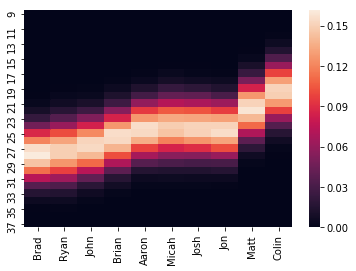

In [86]:
# score distribution for individual players
dist_df = []
for person in persons:
    dist_df.append(pd.DataFrame(df_wins.groupby(person).size() / n_sims))

dist_df = pd.concat(dist_df, axis=1).fillna(0)
dist_df.columns = persons
#dist_df.style.format("{:.1%}")
sns.heatmap(dist_df[person_sort], annot=False)

In [87]:
# union team data to compute wins
a = df[["person1", "team1", "prob1", "week"]].rename(columns={"person1":"person", "team1":"team", "prob1":"prob"})
b = df[["person2", "team2", "prob2", "week"]].rename(columns={"person2":"person", "team2":"team", "prob2":"prob"})
df_union = pd.concat([a, b], axis=0, ignore_index=True)
df_union["win"] = (df_union["prob"] == 1).astype(int)
totals = df_union.groupby(["person", "team"]).sum().reset_index()

In [88]:
# text for Notes app
text = ''
for person in persons:
    team_scores = totals[totals.person==person]
    score_text = "\n".join(" - " + team_scores.team + ": " + team_scores.win.astype(str))
    person_total = "TOTAL: " + str(team_scores.win.sum())
    person_max = "MAX: " + str(df_current.loc[person].max_possible)
    placement_prob = "1st 2nd 3rd: " + " ".join((probs.loc[person]*100).round(0).astype(int).astype(str) + "%")
    parts = [person, score_text, person_total, person_max, placement_prob, "\n"]
    text += "\n".join(parts)
    
open("report.txt", "w").write(text)

955

In [89]:
# scores by week
df_totals = df_union[(df_union.prob==0) | (df_union.prob==1)].groupby(['week', 'person']).sum().reset_index()
df_cumul = df_totals.pivot(index='week', columns='person', values='prob')[persons].cumsum()
df_cumul.round(1)

person,Aaron,Brad,Brian,Colin,John,Jon,Josh,Matt,Micah,Ryan
week,,,,,,,,,,
1,1.0,2.0,2.0,0.0,2.0,2.0,3.0,0.0,1.0,2.0
2,3.0,4.0,4.0,1.0,3.0,3.0,3.0,2.0,4.0,3.0
3,4.0,6.0,5.0,2.0,6.0,4.0,4.0,2.0,6.0,6.0
4,6.0,7.0,6.0,3.0,8.0,7.0,4.0,4.0,8.0,7.0
5,7.0,7.0,7.0,5.0,9.0,8.0,6.0,5.0,9.0,10.0
6,8.0,10.0,8.0,6.0,11.0,9.0,9.0,7.0,9.0,10.0


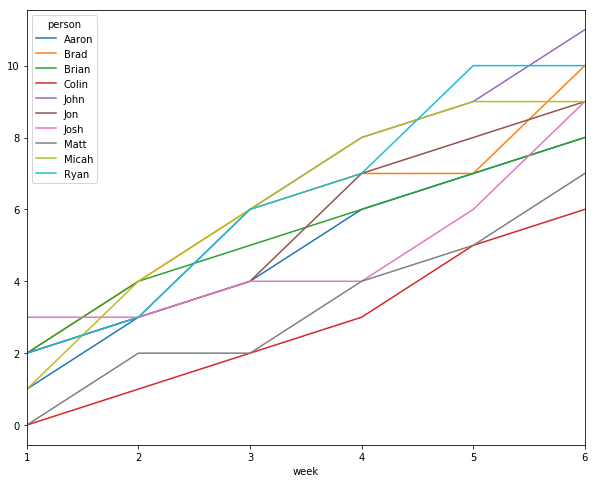

In [90]:
df_cumul.plot(figsize=(10,8))